## Final Project (Midterm)

## Name: Kathryn Lee

## Link to your github repo: https://github.com/nowyouleeme/data1030-final-project

Make sure you are in the DATA1030 environment:

In [12]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


### Intro slide
The intro slide should explain:

**Q1** What is the problem you want to solve? Based on this problem, are you dealing with iid or non-iid data? 

The primary problem I aim to solve is predicting complications following a myocardial infarction (MI), or heart attack, using patient data. Within this overarching goal, several key subproblems emerge:
1. Predicting complications at different stages post-MI, including at the time of hospital admission, and at 24, 48, and 72 hours after admission.
2. Clustering patients into distinct groups based on disease progression to better phenotype MI.
3. Tracking how MI phenotypes evolve dynamically over time, identifying patterns in complication development, and mapping disease trajectories.

Given the time-dependent nature of the dataset and the variability between individual patients, this problem involves non-iid data, as both temporal correlations and patient-specific factors must be accounted for.

**Q2** Why is this important?

Myocardial infarction (MI) presents one of the most complex challenges in modern medicine due to the significant variability in its manifestations among patients. Each year, over a million people in the United States are affected by MI, with 200,000 to 300,000 dying before even reaching the hospital. Alarmingly, someone experiences an MI every 29 seconds, and one patient dies every minute [1].\
MI can occur with or without complications, and these complications can significantly impact long-term prognosis. While some have minimal effects, others can exacerbate the condition and even lead to death. This variability complicates the ability of experienced specialists to predict complications reliably and promptly.\
Therefore, accurately predicting MI complications is essential for enabling early intervention and implementing effective preventive measures.

**Q3** Is this a regression or classification problem?

This is a classification problem, as we are predicting categorical outcomes (complications). The complications, listed in columns 113-124, represent specific, discrete outcomes—whether or not a particular complication is present. This aligns with the nature of classification problems, where the objective is to assign categories or labels to the input data.

**Q4** Where did you get the data from?

I obtained this dataset from the UC Irvine Machine Learning Respository in the "Health and Medicine" subject area.

**Q5** How was data the collected?

The dataset was collected at the Krasnoyarsk Interdistrict Clinical Hospital between 1992 and 1995. It includes data from 1700 separate patients who were admitted for MI, with detailed medical records and information about complications following the event.

### Read in the data

The dataset is located in the `data` folder. 

First, read the data into a pandas data frame and display the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Myocardial infarction complications Database.csv')
display(df)

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


**Input Data:** Columns 2-112 represent patient information (medical history, test results, etc.) used for prediction. Different columns may be excluded at different time stages. \
**Output Data:** Columns 113-124 represent possible complications, which serve as the target variables for prediction.

### EDA

Answer the following EDA related questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First, you always want to know how many data points and features you have, and whether they are continuous or categorical. You should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 2b.

**Q1** How many rows and columns do we have in the dataframe (how many datapoints and features are there)?

In [14]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  1700
Number of columns:  124


**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column.

In [15]:
pd.set_option('display.max_rows', 124) # prevent truncation
print('Data types of features:')
print(df.dtypes)

Data types of features:
ID                 int64
AGE              float64
SEX                int64
INF_ANAM         float64
STENOK_AN        float64
FK_STENOK        float64
IBS_POST         float64
IBS_NASL         float64
GB               float64
SIM_GIPERT       float64
DLIT_AG          float64
ZSN_A            float64
nr_11            float64
nr_01            float64
nr_02            float64
nr_03            float64
nr_04            float64
nr_07            float64
nr_08            float64
np_01            float64
np_04            float64
np_05            float64
np_07            float64
np_08            float64
np_09            float64
np_10            float64
endocr_01        float64
endocr_02        float64
endocr_03        float64
zab_leg_01       float64
zab_leg_02       float64
zab_leg_03       float64
zab_leg_04       float64
zab_leg_06       float64
S_AD_KBRIG       float64
D_AD_KBRIG       float64
S_AD_ORIT        float64
D_AD_ORIT        float64
O_L_POST         float64
K

**Q3** Are there any imbalanced classes or missing values?

All classes are imbalanced: 
FIBR_PREDS
0    1530
1     170
Name: count, dtype: int64


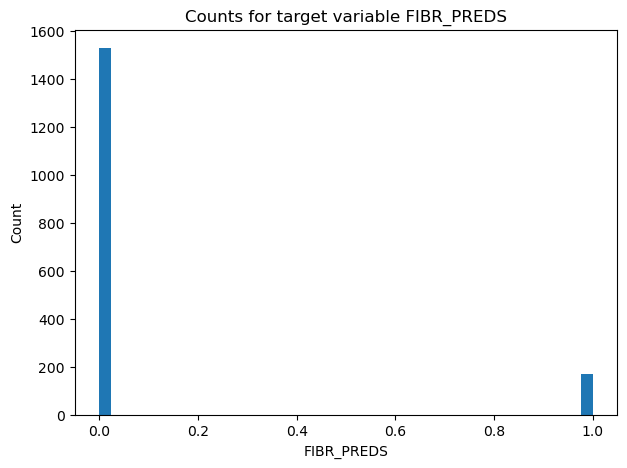

PREDS_TAH
0    1680
1      20
Name: count, dtype: int64


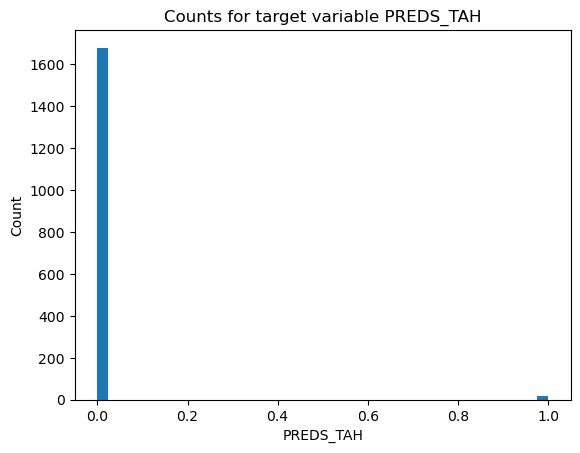

JELUD_TAH
0    1658
1      42
Name: count, dtype: int64


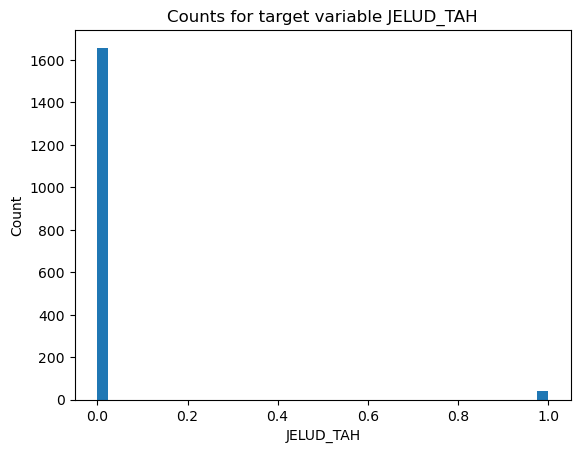

FIBR_JELUD
0    1629
1      71
Name: count, dtype: int64


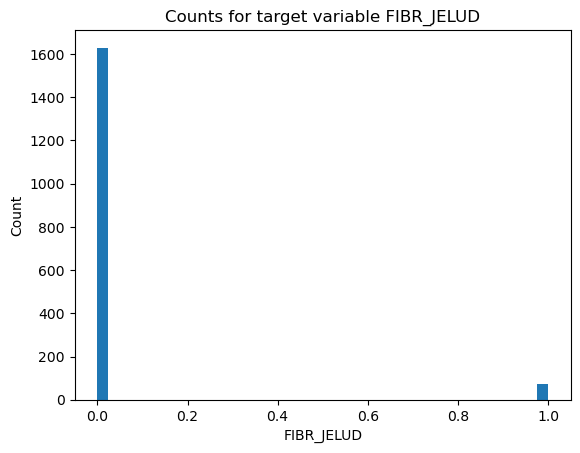

A_V_BLOK
0    1643
1      57
Name: count, dtype: int64


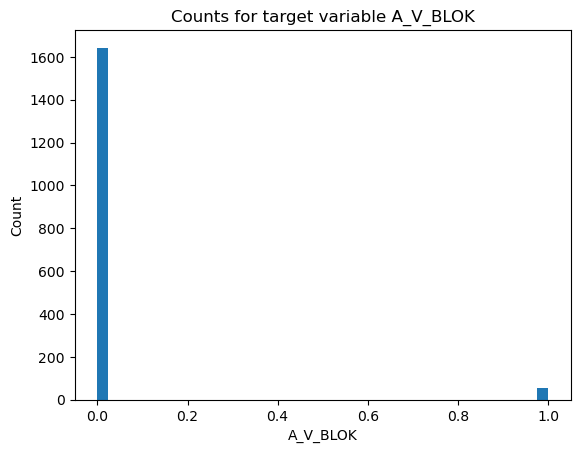

OTEK_LANC
0    1541
1     159
Name: count, dtype: int64


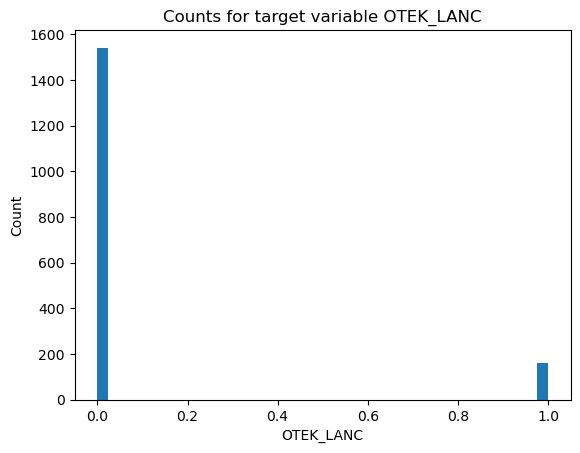

RAZRIV
0    1646
1      54
Name: count, dtype: int64


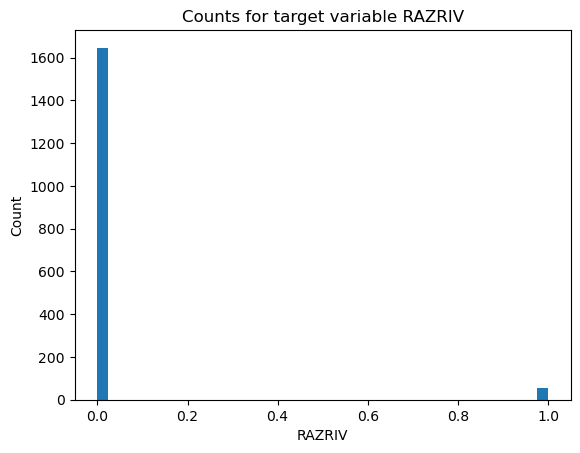

DRESSLER
0    1625
1      75
Name: count, dtype: int64


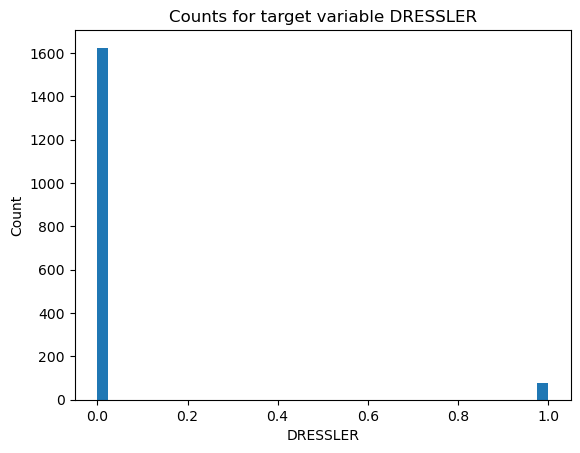

ZSN
0    1306
1     394
Name: count, dtype: int64


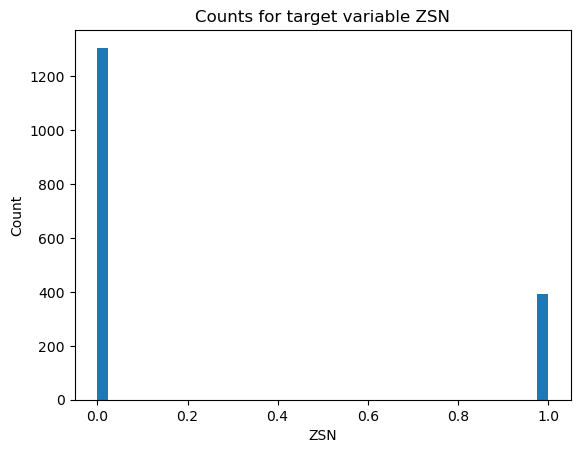

REC_IM
0    1541
1     159
Name: count, dtype: int64


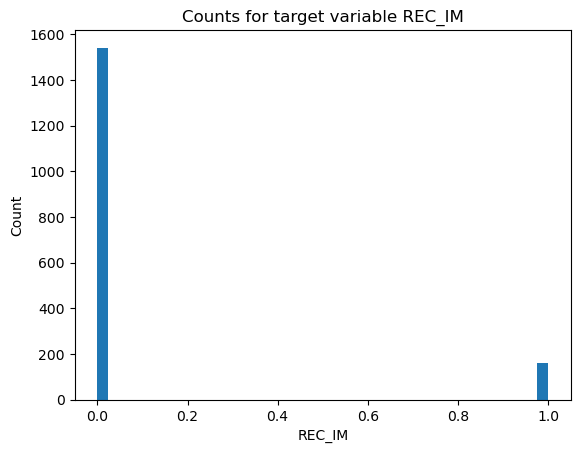

P_IM_STEN
0    1552
1     148
Name: count, dtype: int64


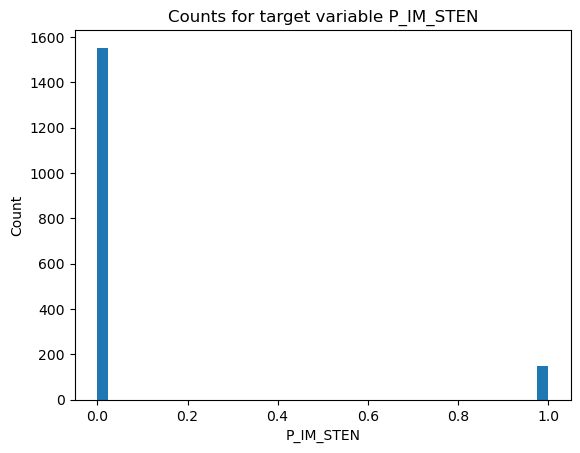

LET_IS
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: count, dtype: int64


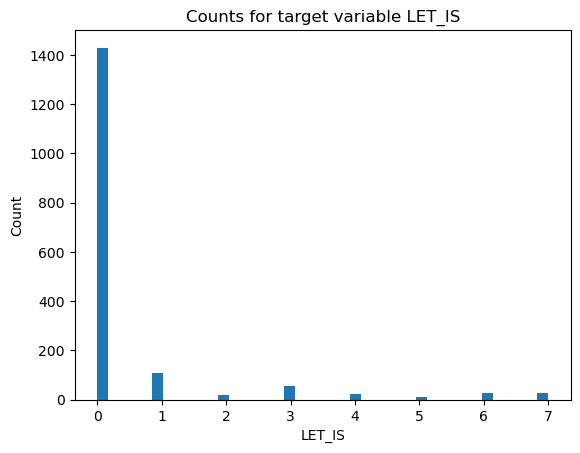

Missing values percentage per column:
ID                0.000000
AGE               0.470588
SEX               0.000000
INF_ANAM          0.235294
STENOK_AN         6.235294
FK_STENOK         4.294118
IBS_POST          3.000000
IBS_NASL         95.764706
GB                0.529412
SIM_GIPERT        0.470588
DLIT_AG          14.588235
ZSN_A             3.176471
nr_11             1.235294
nr_01             1.235294
nr_02             1.235294
nr_03             1.235294
nr_04             1.235294
nr_07             1.235294
nr_08             1.235294
np_01             1.058824
np_04             1.058824
np_05             1.058824
np_07             1.058824
np_08             1.058824
np_09             1.058824
np_10             1.058824
endocr_01         0.647059
endocr_02         0.588235
endocr_03         0.588235
zab_leg_01        0.411765
zab_leg_02        0.411765
zab_leg_03        0.411765
zab_leg_04        0.411765
zab_leg_06        0.411765
S_AD_KBRIG       63.294118
D_AD_KBRIG       

In [16]:
# classes = the distinct categories or labels that a model predicts in classification problems
# Utilize provided "Myocardial infarction complications Database description" pdf to determine where to look
from matplotlib import pylab as plt
plt.figure(figsize=(7,5))
classes = df.iloc[:, 112:124].columns.tolist() # all of the target variables

print("All classes are imbalanced: ")
for class_ in classes:
    print(df[class_].value_counts())  # Check class distribution
    df[class_].plot.hist(bins=int(np.sqrt(df.shape[0])))
    plt.title(f'Counts for target variable {class_}')
    plt.xlabel(f'{class_}')
    plt.ylabel('Count')
    plt.show()

# missing values
missing_percentage = df.isna().mean() * 100
print("Missing values percentage per column:")
print(missing_percentage)
frac_missing = (df.isna().sum(axis=1) != 0).sum() / df.shape[0]
print("Percentage of points with at least one missing value:", 100*round(frac_missing, 4), "%")

**Q3** The ML target variable in this dataset is the ____. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature.

In [17]:
# .describe = insightful when data is continuous
print(df["LET_IS"].describe())

# .value_counts = insightful when data is categorical
print(df["LET_IS"].value_counts())

count    1700.000000
mean        0.477059
std         1.381818
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: LET_IS, dtype: float64
LET_IS
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: count, dtype: int64


This dataset includes multiple possible target variables (as stated by the authors themselves), ranging from atrial fibrillation and pulmonary edema to relapse of the myocardial infarction and the lethal outcome. While handling multiple target variables at once would be the most holistic approach, due to the limitations of supervised learning, I am going to focus on the target variable "lethal outcome (cause)," or "LET_IS" for its greater robustness relative to the other target variables. "LET_IS" is categorical, according to the dataset's description PDF provided, in which each data point is labeled with an integer ranging from 0-7 with an associated outcome: unknown (0), cardiogenic shock (1), pulmonary edema (2), myocardial rupture (3), progress of congestive heart failure (4), thromboembolism (5), asystole (6), and ventricular fibrillation (7). The other target variables are also categorical but are all in the format of yes/no for a given condition, which is quite limiting. \
We can also check that this by using the .describe() and .value_counts() function, in which .value_counts() (which is best for represting categoriccal data) was the only function that gave us useful information in understanding the lethal outcome data (how many of each lethal outcome was recorded for the data points). On the other hand, the .describe() (which is best for continuous data) function did not give us any useful additional information about the data, in which the statistical calculations (mean, standard deviation, max, etc.) doesn't make it any easier to work with or represent the discrete categories of the "LET_IS" target variable. 

**Q5** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data.

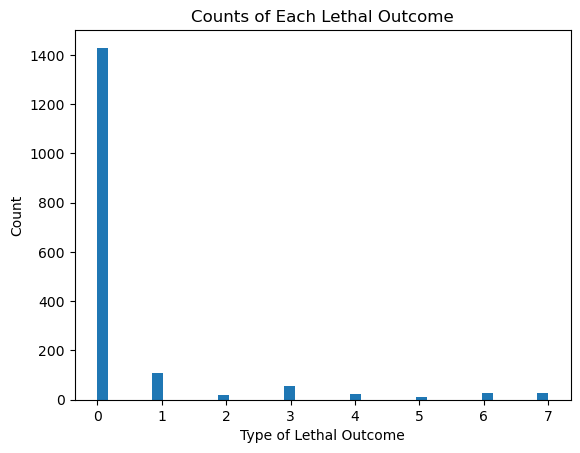

In [20]:
df["LET_IS"].plot.hist(bins=int(np.sqrt(df.shape[0])))
plt.title('Counts of Each Lethal Outcome')
plt.xlabel('Type of Lethal Outcome')
plt.ylabel('Count')
plt.show()

**Q6** Create as many figures you can to better understand your dataset and calculate summary statistics as well. Then, select three figures that you want to show during the presentation. \
Explain why you chose the figures! Why are they interesting, unexpected, important?

Visualization of lethal outcomes against categorical features:


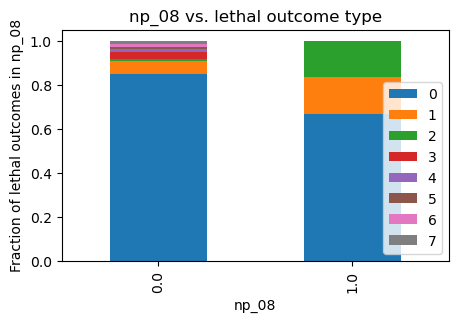

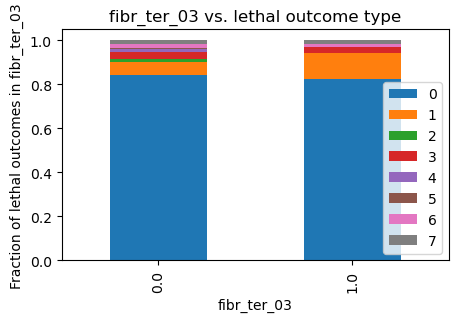

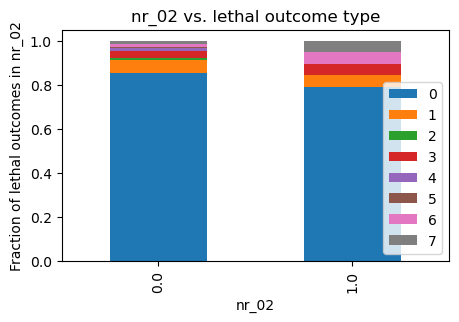

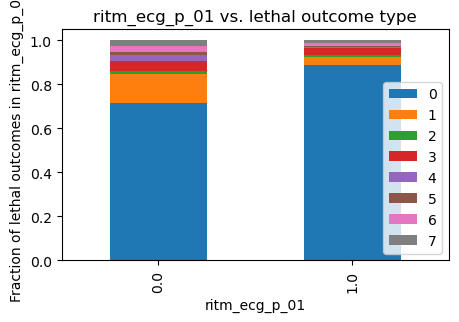

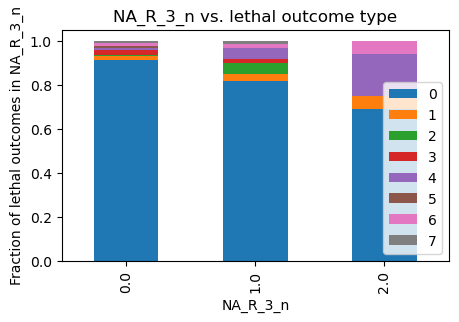

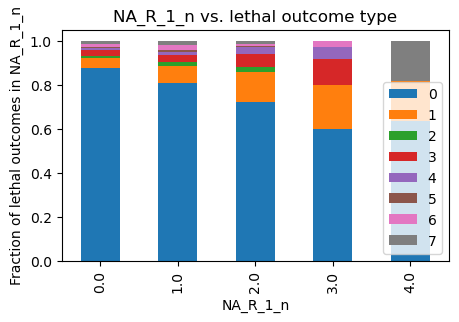

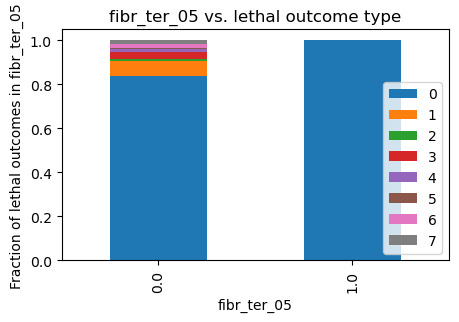

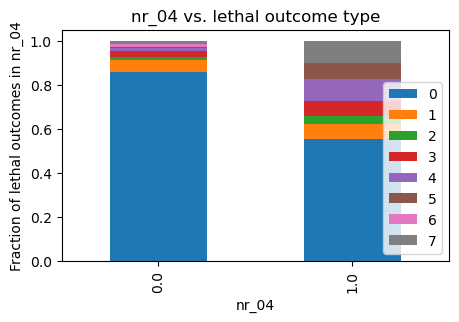

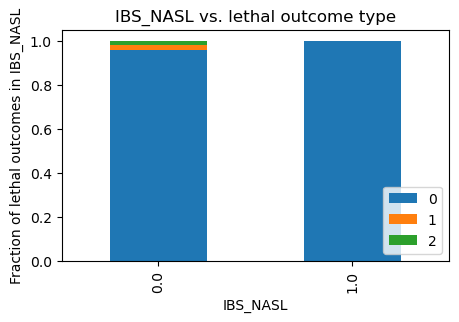

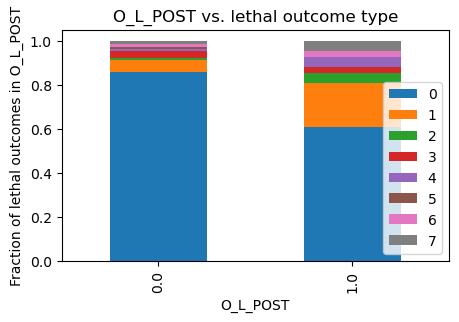

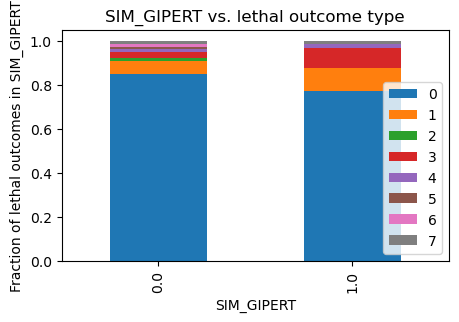

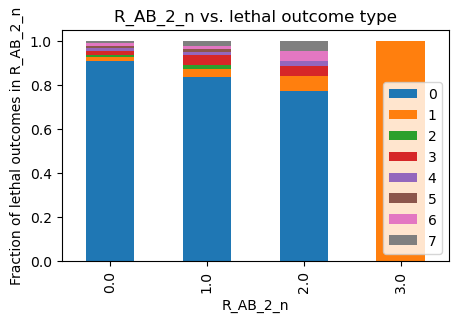

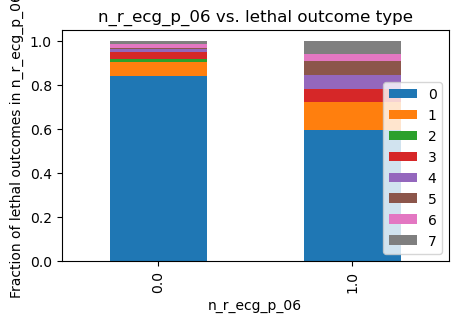

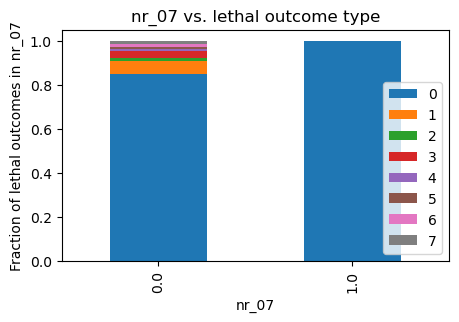

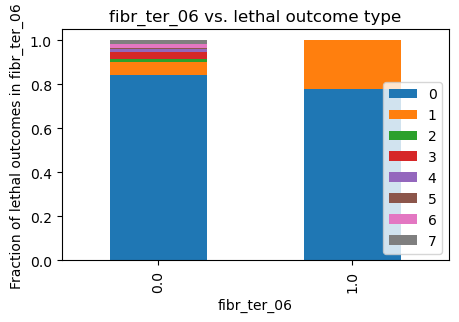

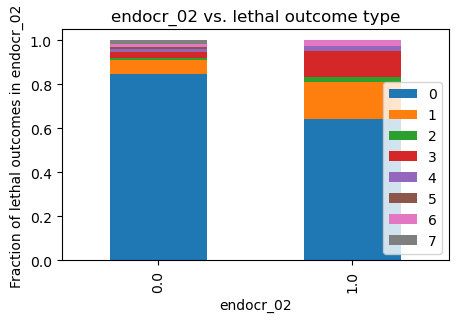

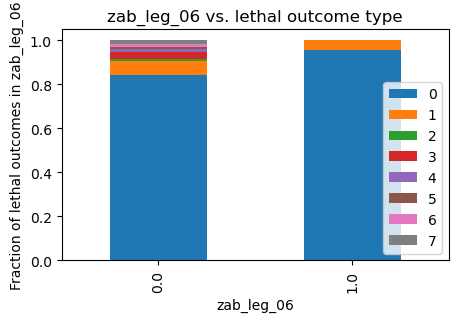

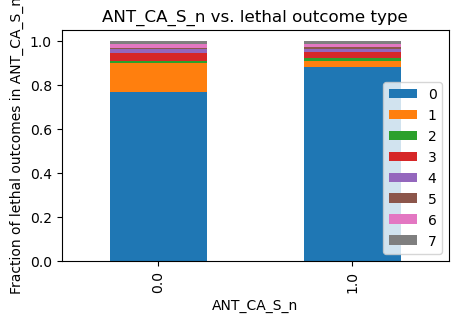

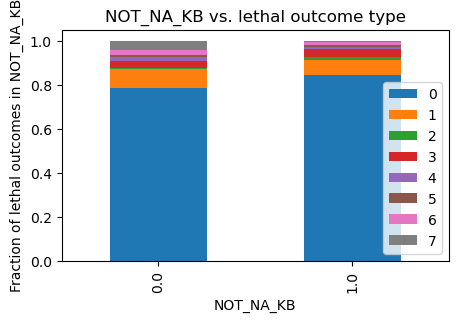

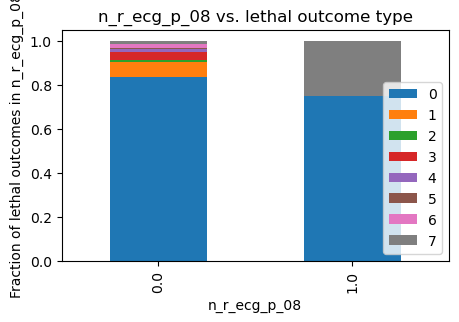

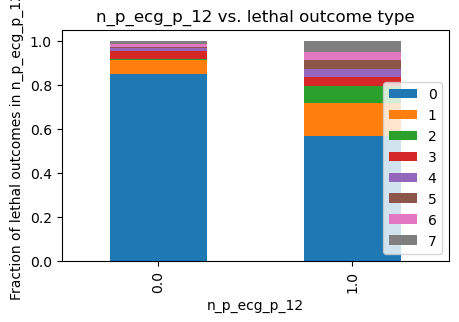

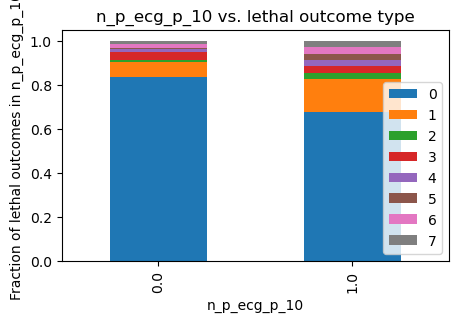

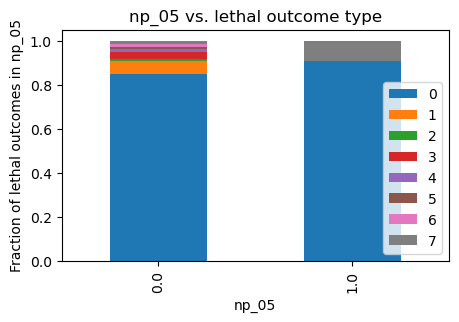

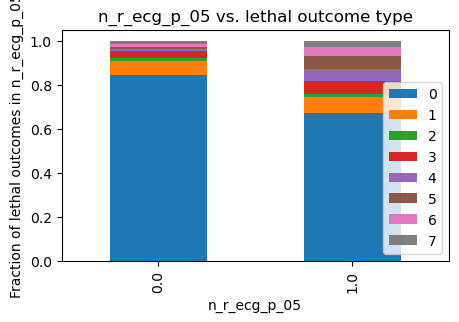

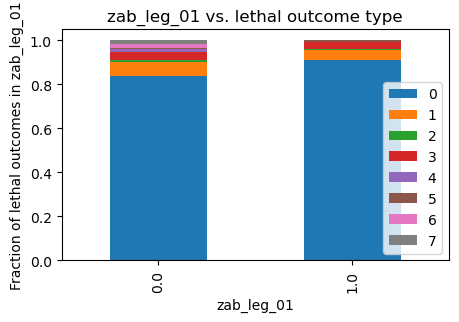

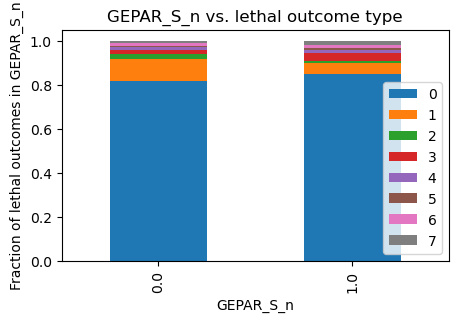

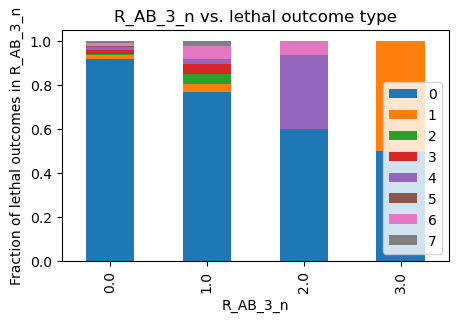

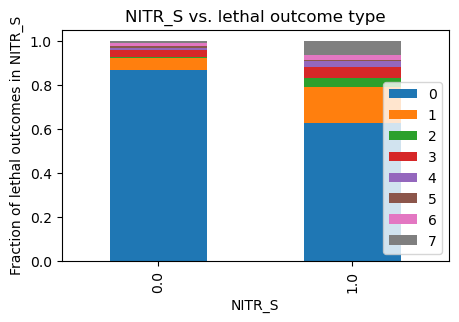

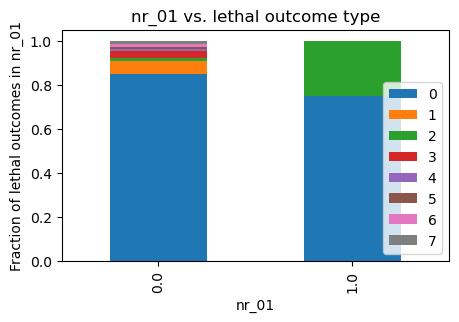

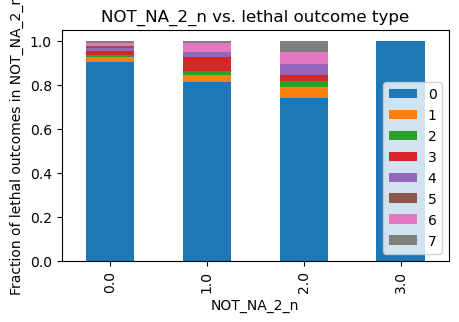

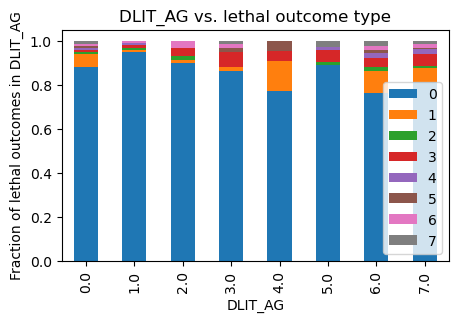

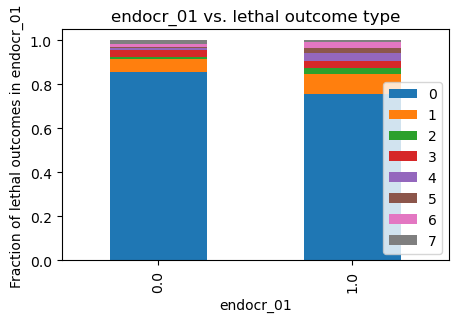

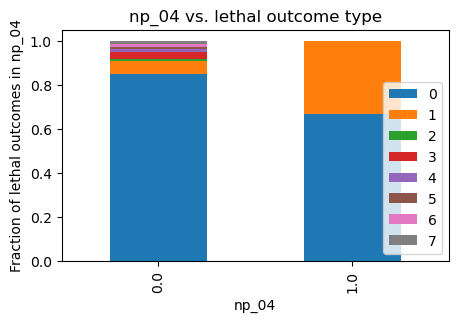

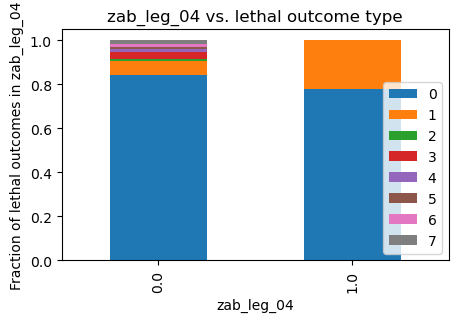

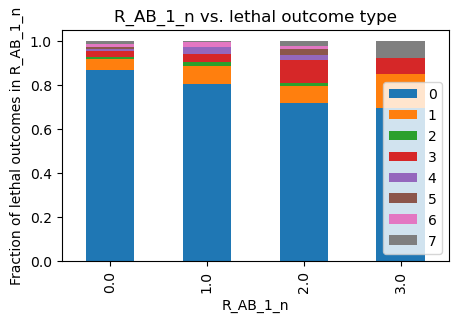

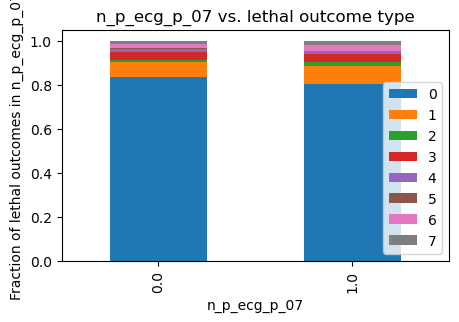

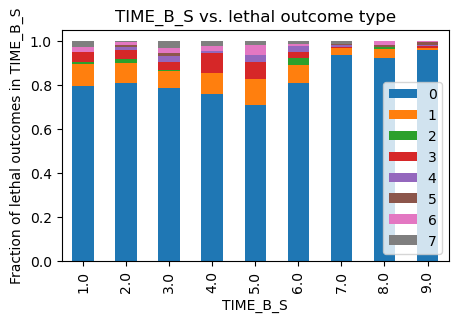

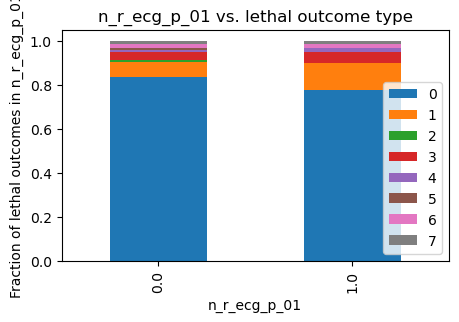

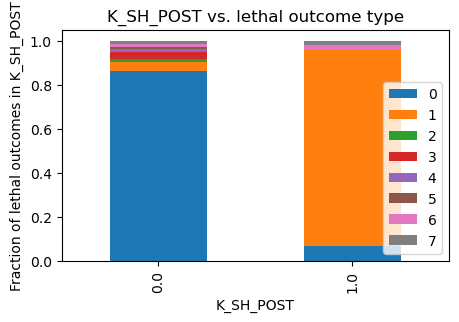

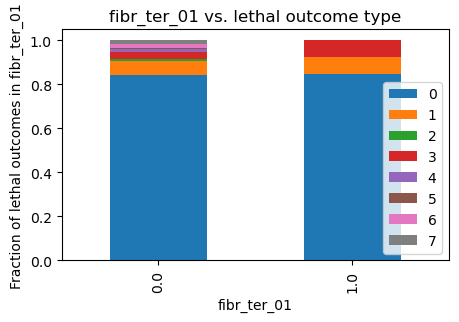

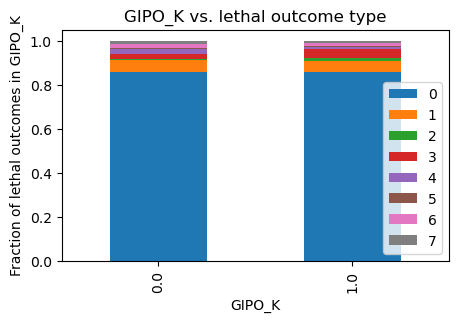

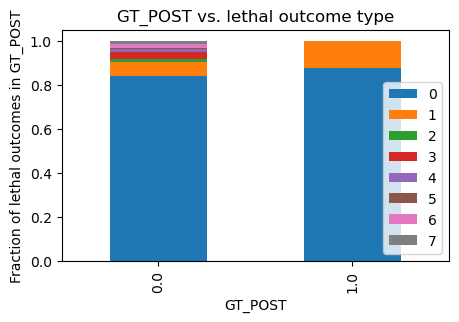

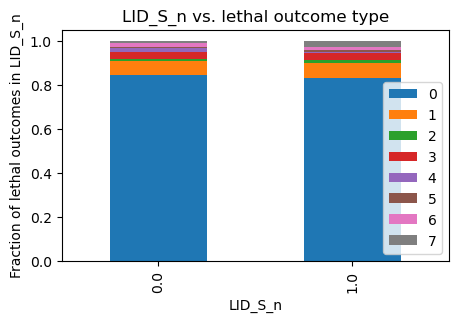

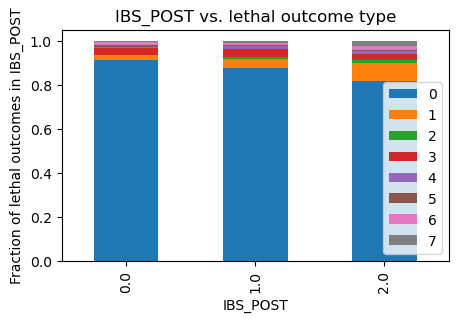

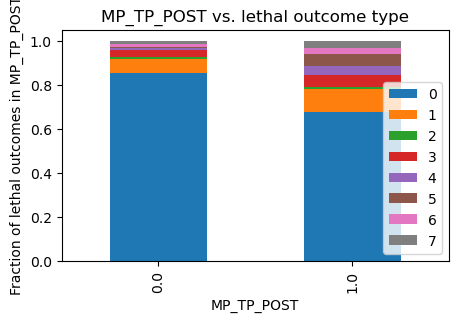

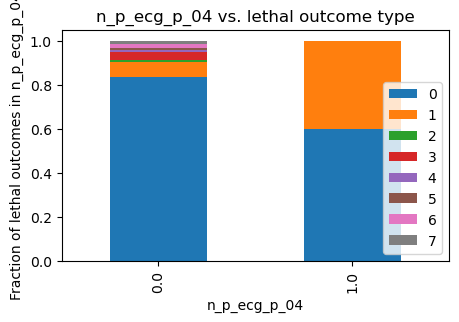

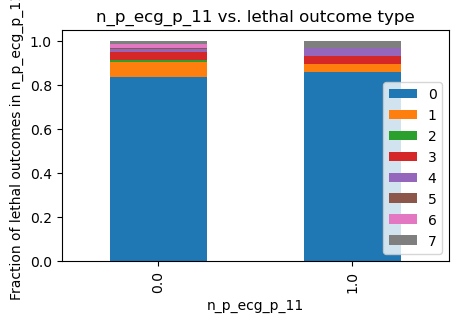

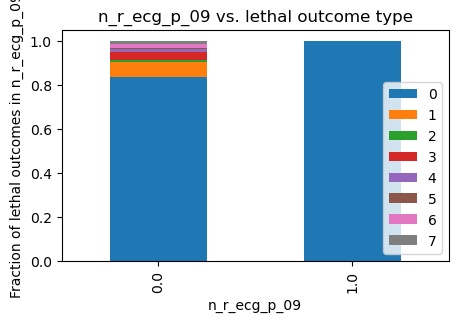

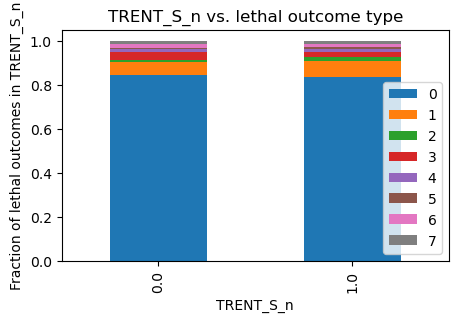

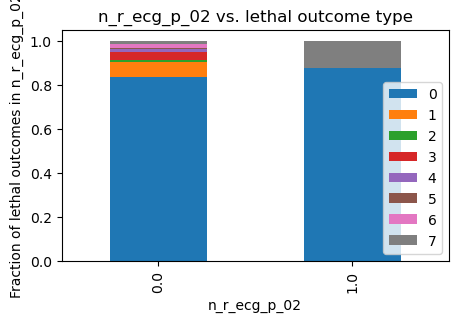

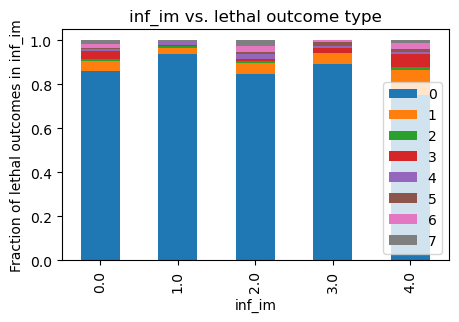

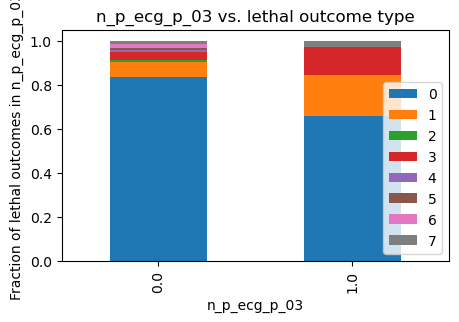

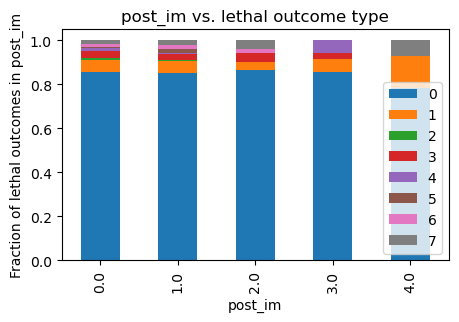

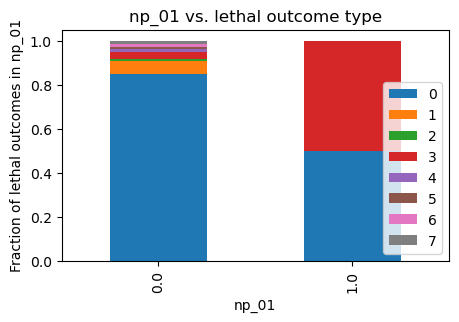

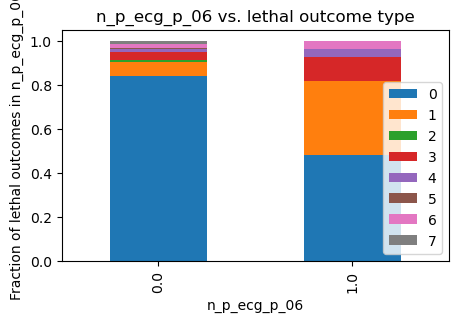

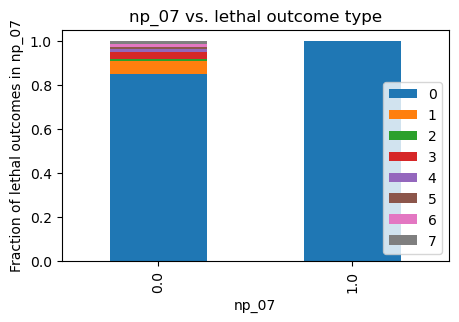

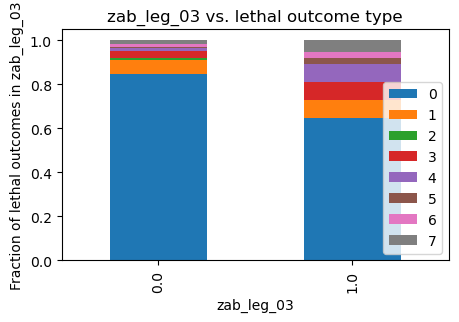

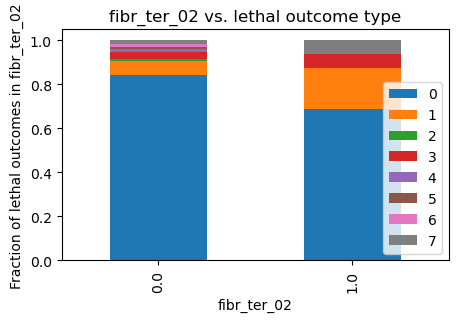

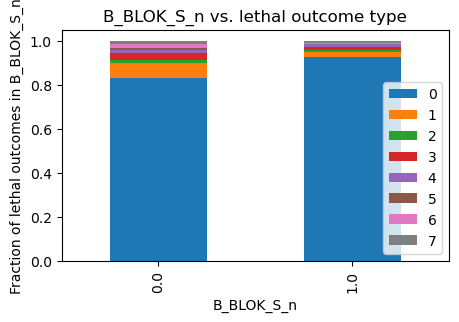

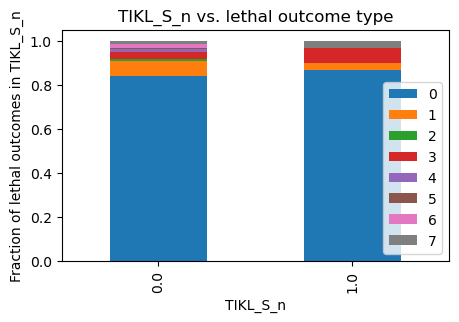

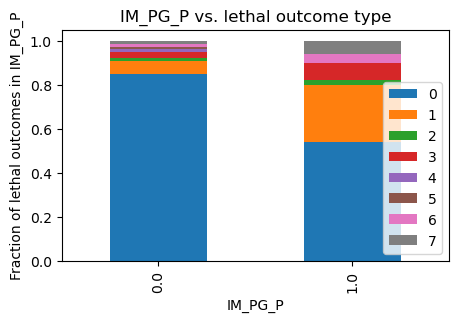

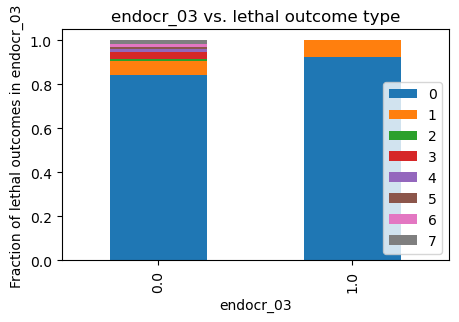

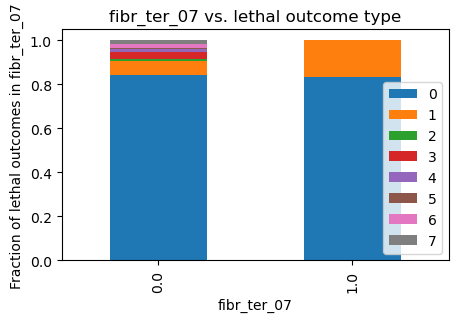

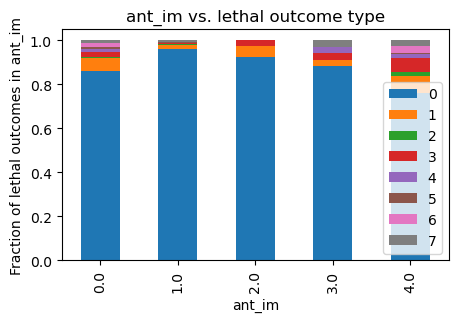

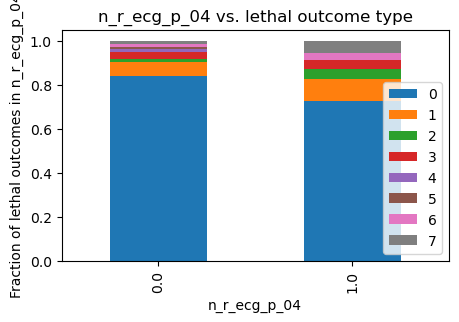

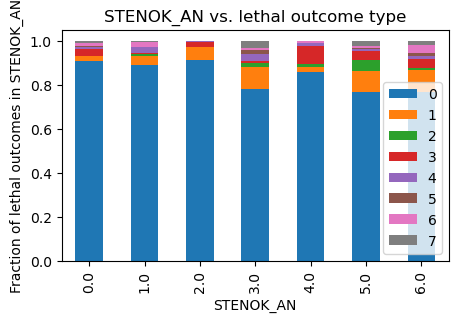

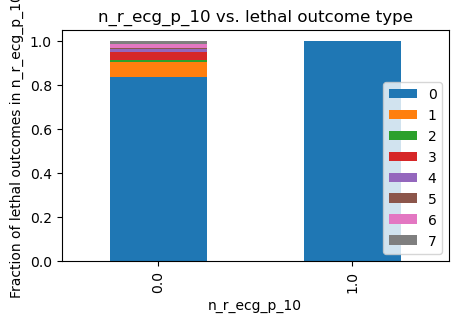

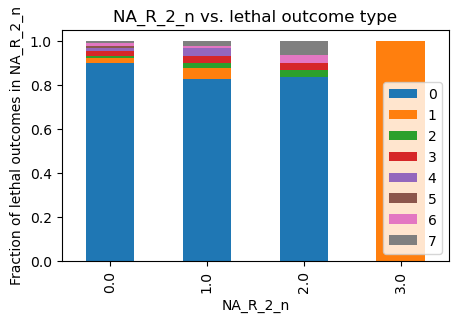

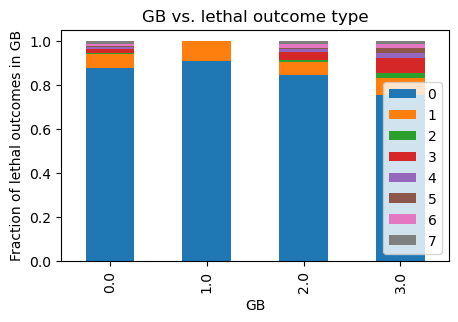

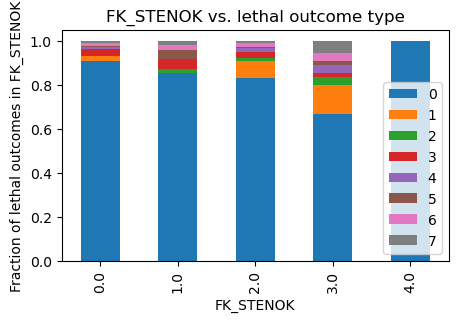

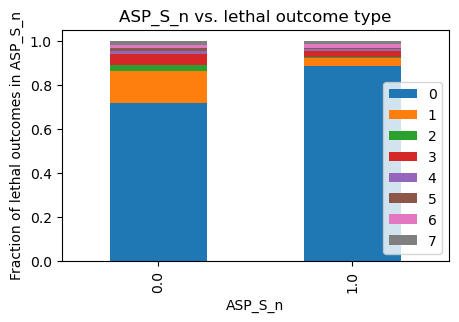

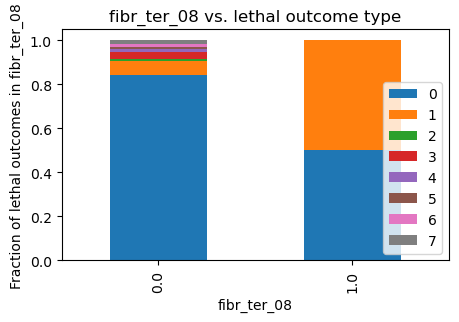

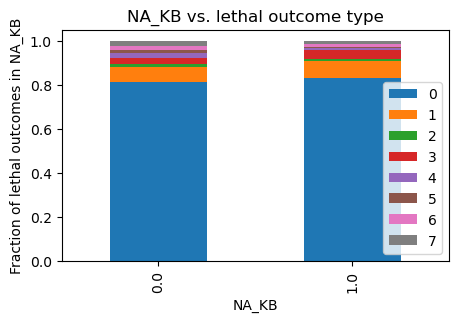

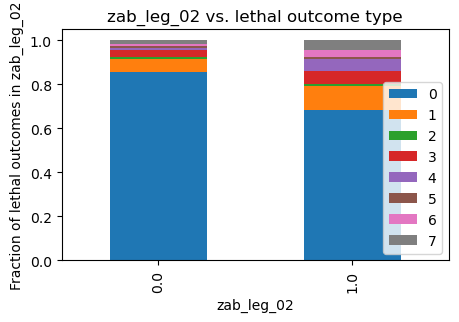

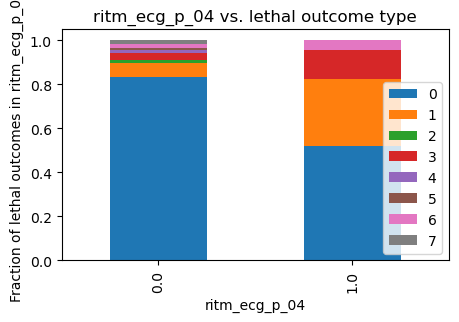

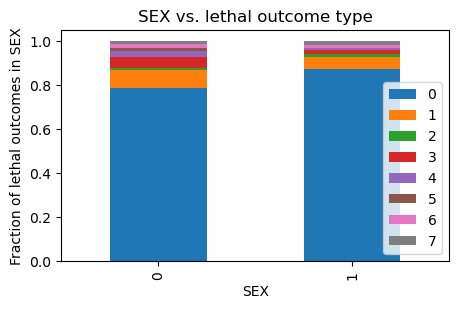

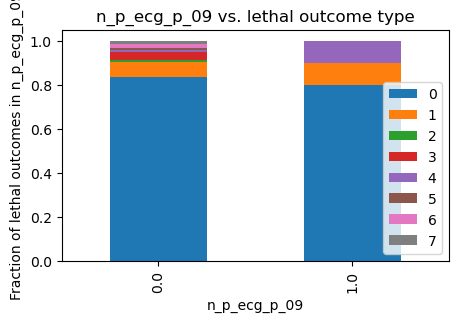

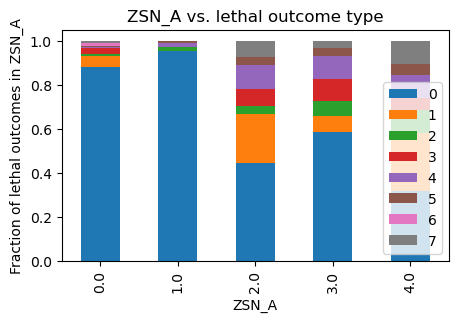

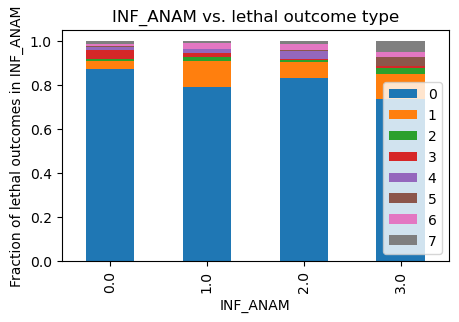

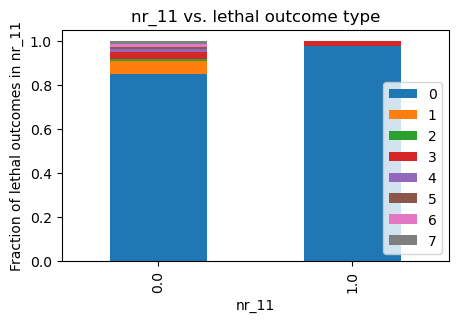

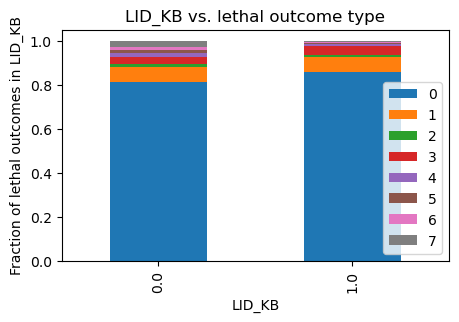

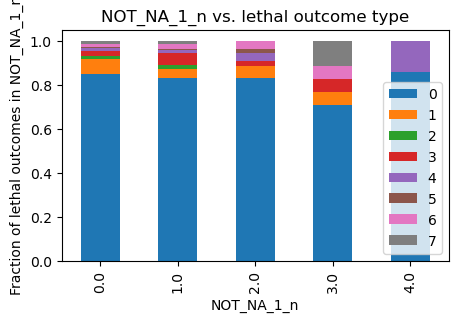

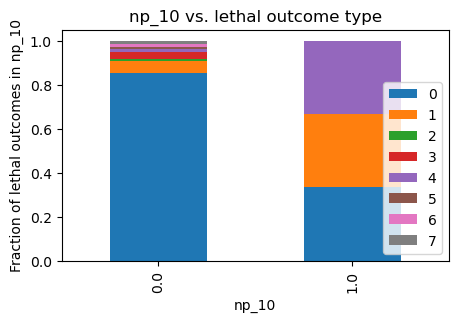

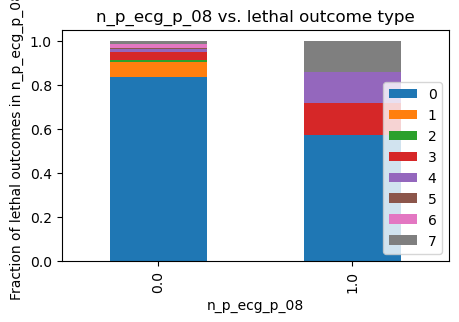

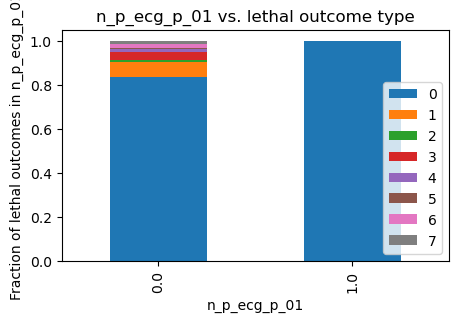

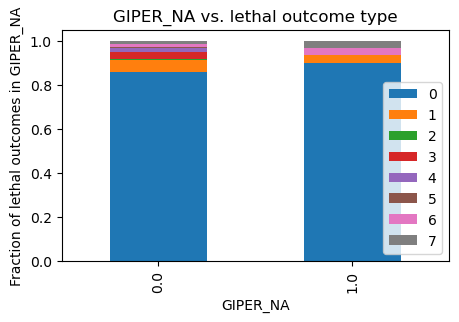

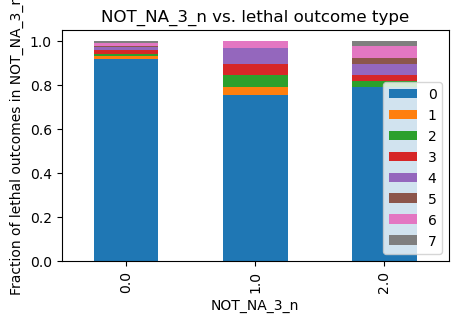

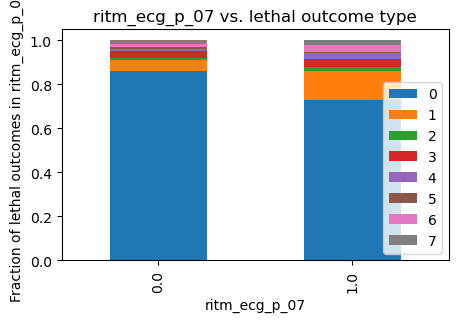

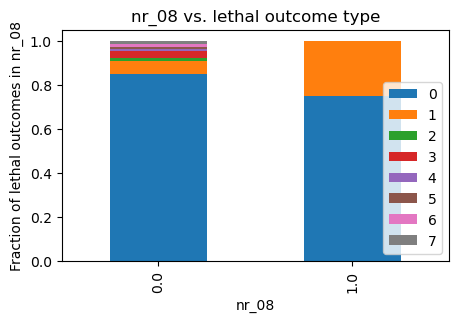

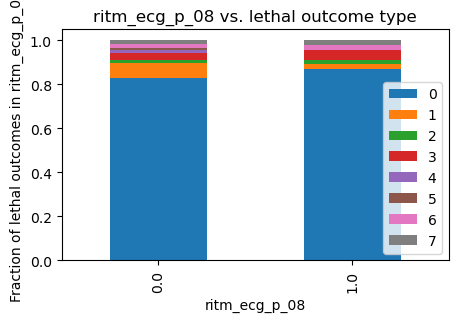

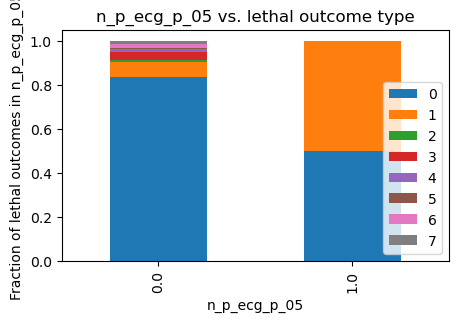

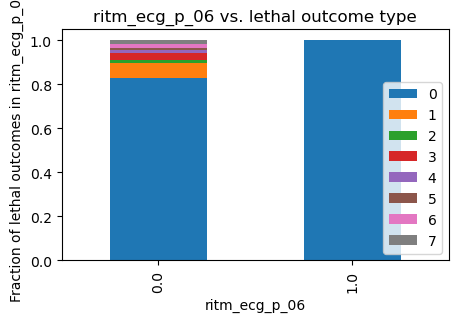

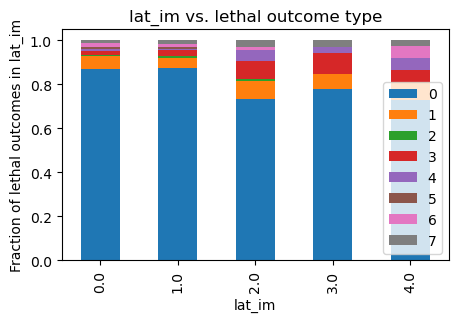

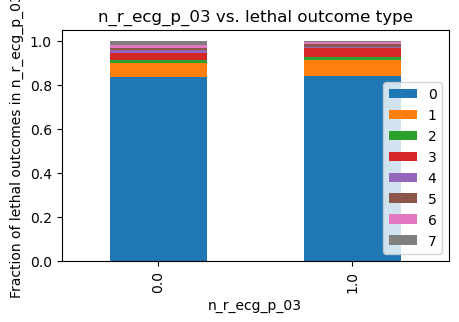

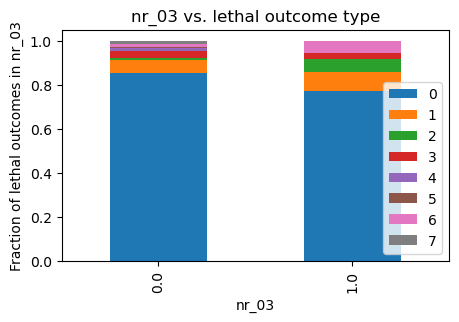

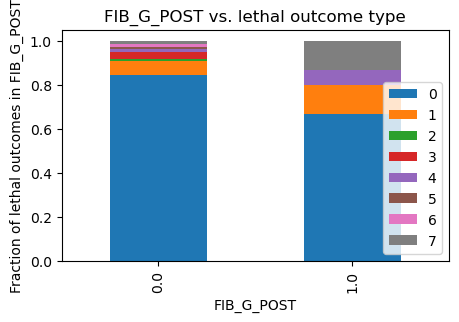

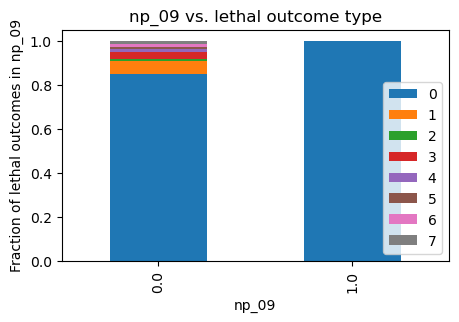

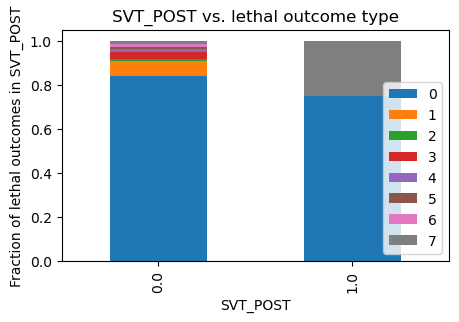

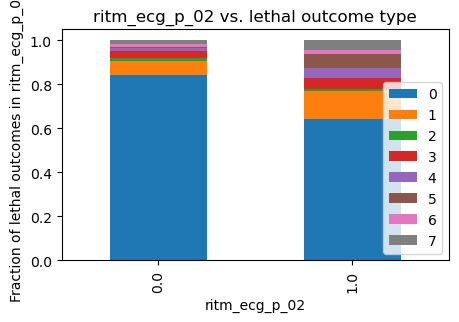

Visualization of lethal outcomes against continuous features:
1. Category-specific histograms


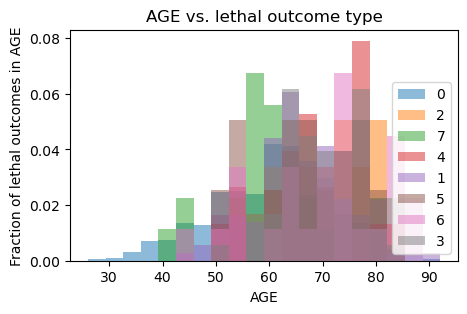

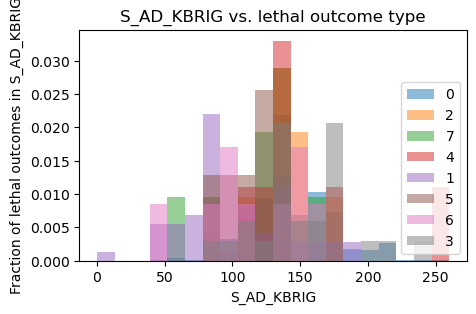

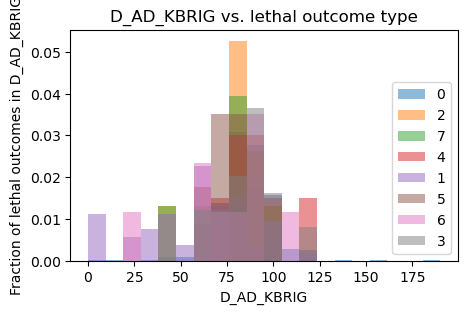

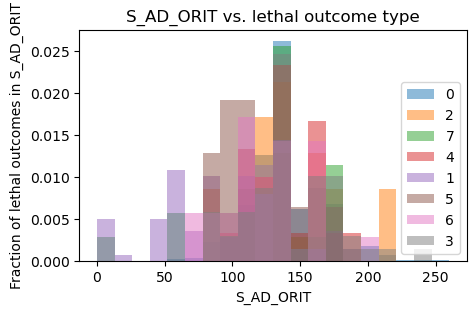

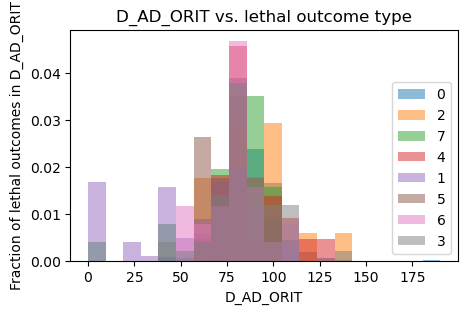

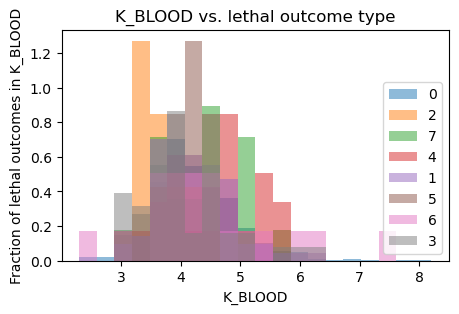

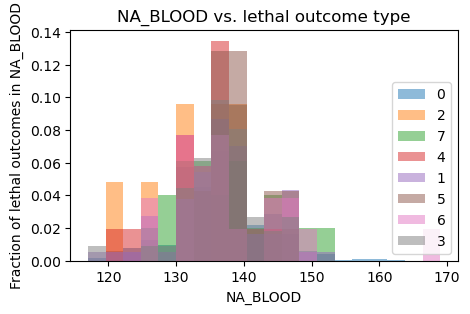

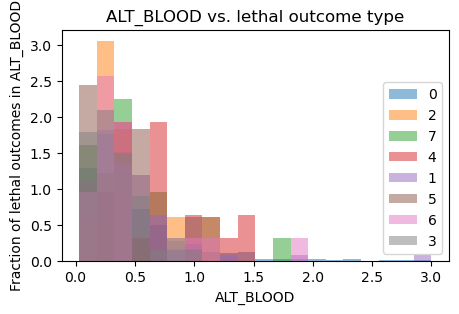

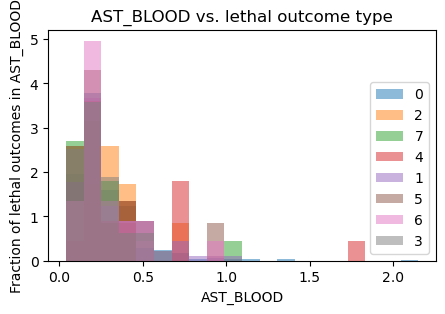

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


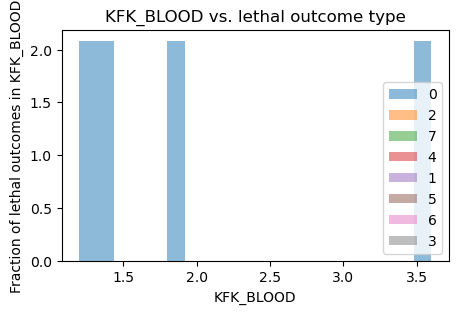

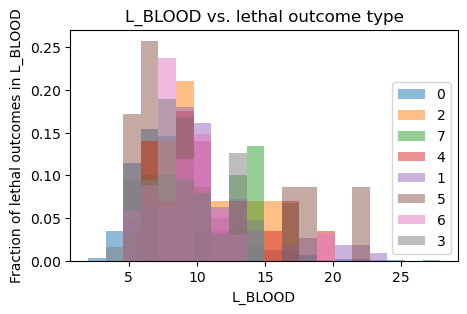

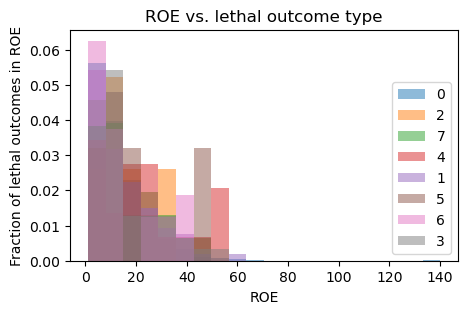

2. Box plots


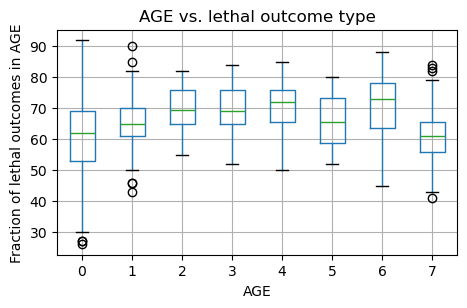

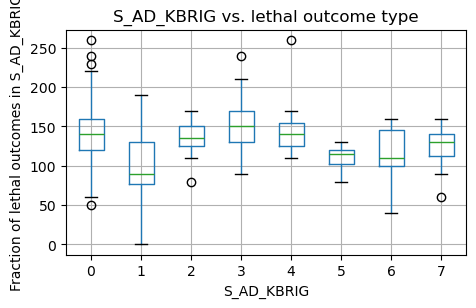

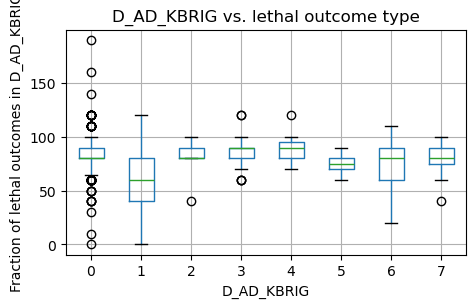

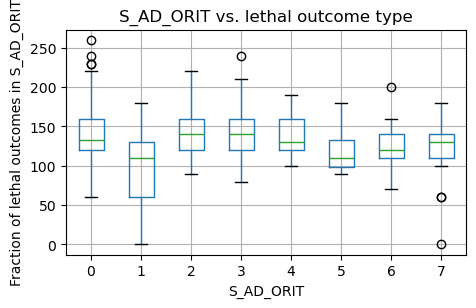

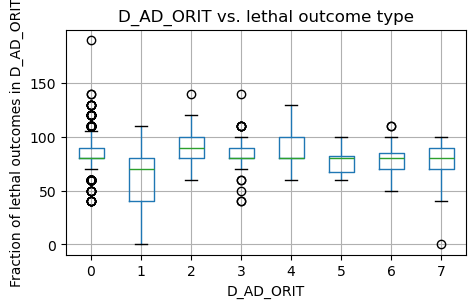

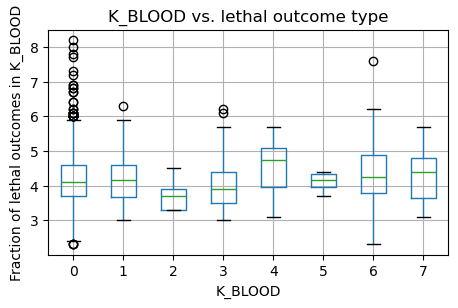

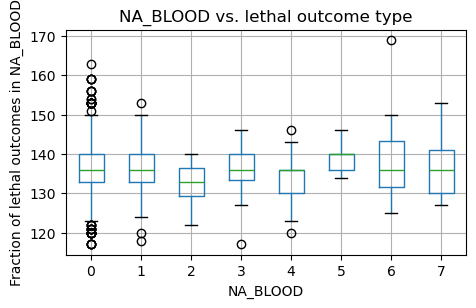

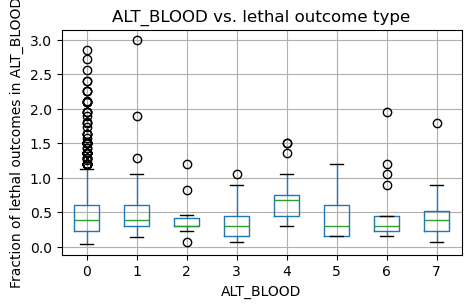

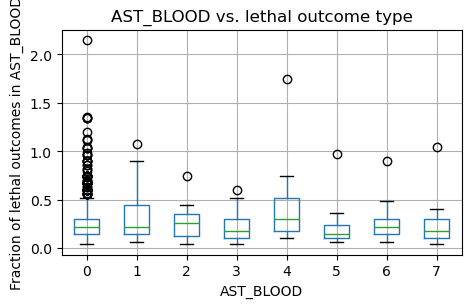

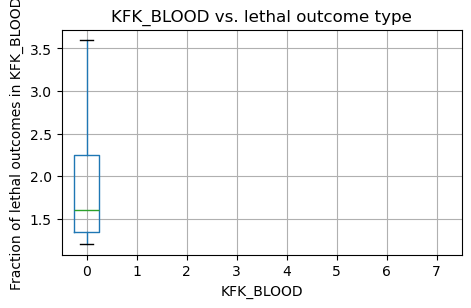

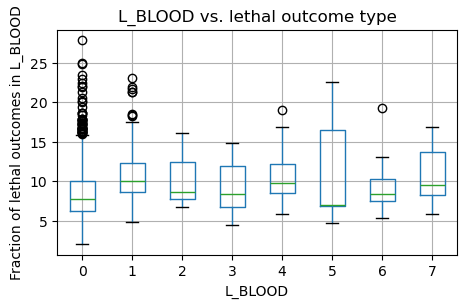

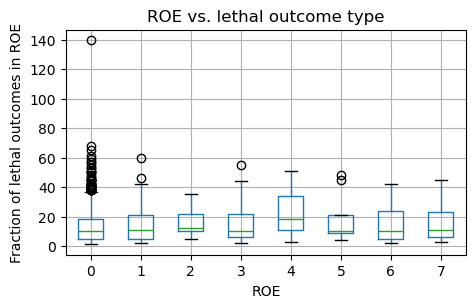

3. Violin plots


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


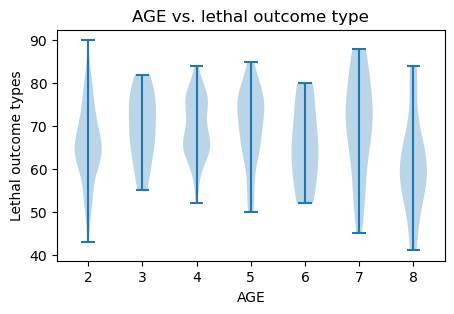

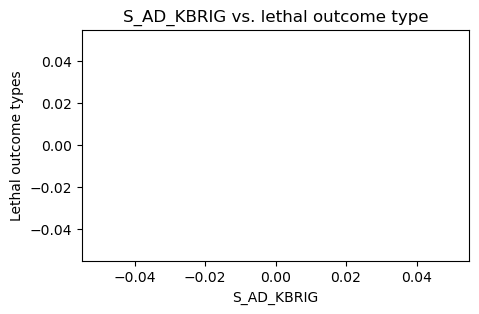

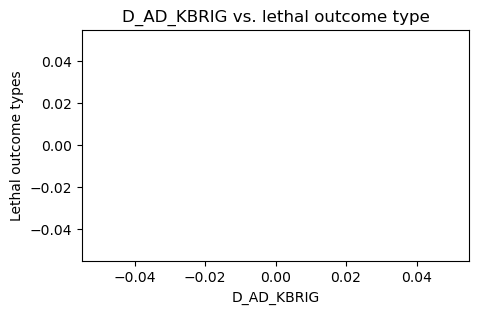

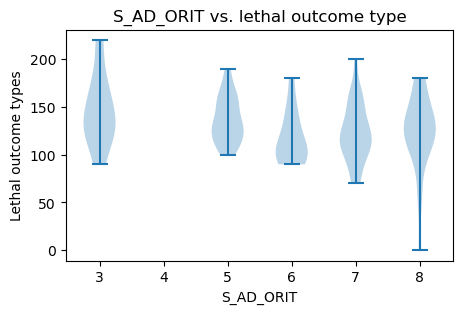

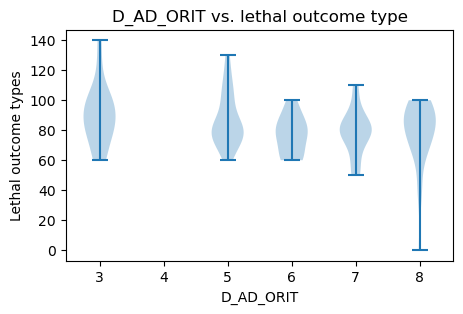

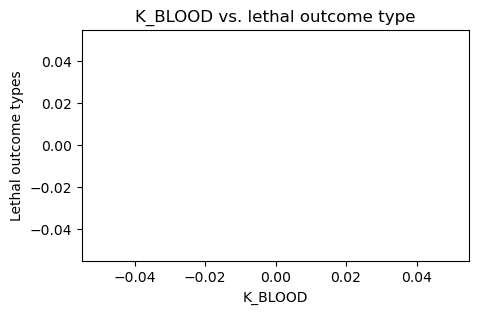

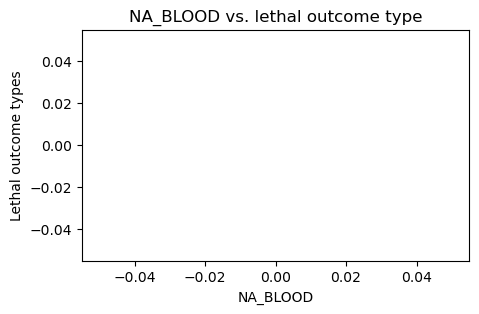

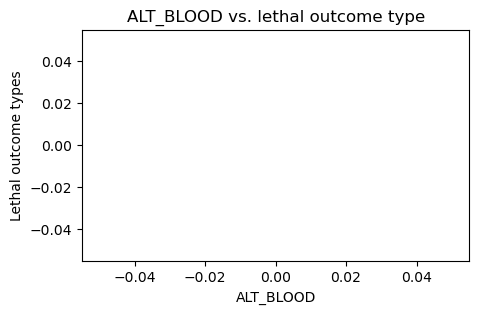

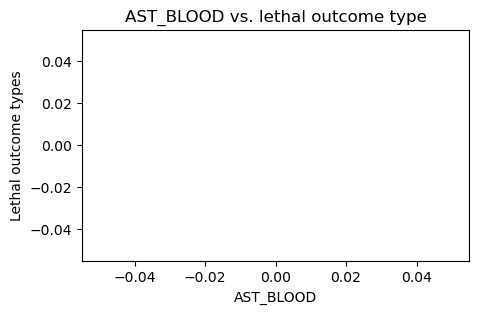

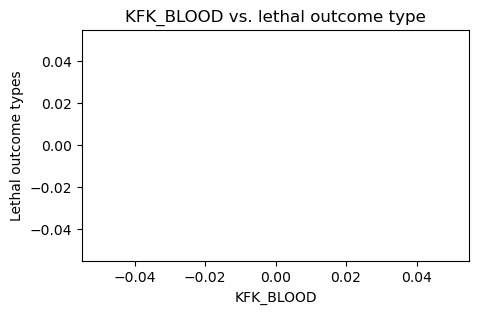

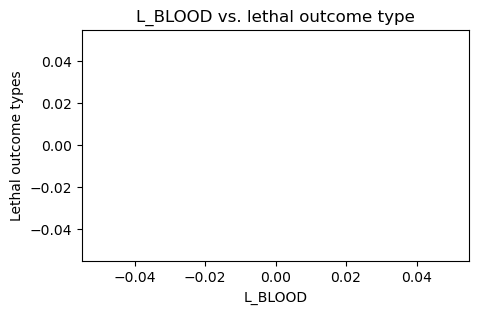

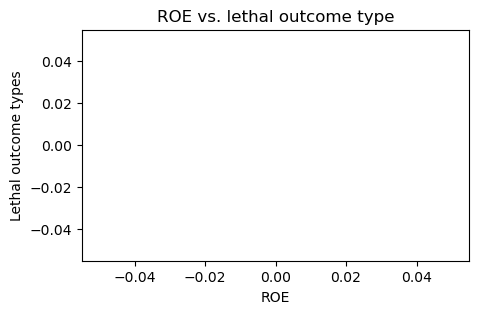

In [38]:
# continuous features: AGE, S_AD_KBRIG, D_AD_KBRIG, S_AD_ORIT, D_AD_ORIT, K_BLOOD, Na_BLOOD, ALT_BLOOD, AST_BLOOD, KFK_BLOOD, L_BLOOD, ROE
# cateogorical features: all others

all_features = df.iloc[:, 1:112].columns.tolist()
continuous_features = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
categorical_features = list(set(all_features) - set(continuous_features))

# categorical vs categorical: stacked box plot
print("Visualization of lethal outcomes against categorical features:")
for feature in categorical_features:
    count_matrix = df.groupby([feature, 'LET_IS']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
    plt.title(f'{feature} vs. lethal outcome type')
    plt.ylabel(f"Fraction of lethal outcomes in {feature}")
    plt.xlabel(feature)
    plt.legend(loc=4)
    plt.show()

# need to parse out ordinal features

# continuous vs categorical: category-specific histograms, box plots, violin plots
print("Visualization of lethal outcomes against continuous features:")
print("1. Category-specific histograms")
categories = df['LET_IS'].unique()
for feature in continuous_features:
    bin_range = (df[feature].min(),df[feature].max())
    plt.figure(figsize=(5,3))
    for c in categories:
        plt.hist(df[df['LET_IS']==c][feature], alpha=0.5, label=c, range=bin_range, bins=20, density=True)
    plt.title(f'{feature} vs. lethal outcome type')
    plt.ylabel(f"Fraction of lethal outcomes in {feature}")
    plt.xlabel(feature)
    plt.legend(loc=4)
    plt.show()

print("2. Box plots")
for feature in continuous_features:
    df[[feature, 'LET_IS']].boxplot(by='LET_IS', figsize=(5,3))
    plt.suptitle('')
    plt.title(f'{feature} vs. lethal outcome type')
    plt.ylabel(f"Fraction of lethal outcomes in {feature}")
    plt.xlabel(feature)
    plt.show()

print("3. Violin plots")
for feature in continuous_features:
    dataset = [df[df['LET_IS']==0][feature].values,
              df[df['LET_IS']==1][feature].values,
              df[df['LET_IS']==2][feature].values,
              df[df['LET_IS']==3][feature].values,
              df[df['LET_IS']==4][feature].values,
              df[df['LET_IS']==5][feature].values,
              df[df['LET_IS']==6][feature].values,
              df[df['LET_IS']==7][feature].values]
    plt.figure(figsize=(5,3))
    plt.violinplot(dataset=dataset)
    plt.title(f'{feature} vs. lethal outcome type')
    plt.ylabel('Lethal outcome types')
    plt.xlabel(feature)
    plt.show()

### Split the data
Splitting methods: 
1. iid data: basic split, K-fold Cross-Validation, stratified split, stratified K-fold
2. non-iid data: GroupKFold, GroupShuffleSplit, TimeSeriesSplit

**Q1** How would you split this data and why?

Given that for each patient, 
data taken for diff time points (time of admission, end of first day, end of second day,and end of third day) 
most likely time series split???


**Q2** Split the dataset into training, validation, and test sets.

**Q3** Is your splitting method reproducible? How do you know? 

### Preprocess the data
Preprocessing methods: 
1. OneHotEncoder - converts unordered categorical features into dummy arrays
2. OrdinalEncoder - converts ordinal features into an integer array
3. MinMaxScaler - scales continuous variables to be between 0 and 1
4. StandardScaler - standardies continuous features by removing the mean and scaling to unit variance

**Q1** What preprocessors will you use and why?

categorical features -> onehotencoder
- ordinal features -> ordinial encoder
continuous features -> minmax scaler

**Q2** Preprocess your data.

**Q3** How many features and data points do you have before and after preprocessing?

In [ ]:
check shape of training sets

### Handling missing values
If you have missing values, describe the basic properties of the missing values (e.g., what fraction of the points have missing values, which features, what fraction of the features are missing, etc).